# Notes from Python for Finance Cookbook

In [1]:
print("Python Investment Aid")

Python Investment Aid


## Data Gathering

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date
import numpy as np

today = date.today().strftime("%Y-%m-%d")
start_date = date.today().replace(year=date.today().year-6)

print("today ",today)
print("start", start_date)


def init_ticker(name):
    return yf.Ticker(name)


stock = init_ticker("MSFT")
stock.history(period="1mo")



/Users/abhisawa/git/pyworkspace/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


today  2023-07-29
start 2017-07-29


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-29 00:00:00-04:00,334.709991,336.109985,332.619995,335.049988,16997000,0.0,0.0
2023-06-30 00:00:00-04:00,337.750000,342.730011,337.200012,340.540009,26823800,0.0,0.0
2023-07-03 00:00:00-04:00,339.190002,340.899994,336.570007,337.989990,12508700,0.0,0.0
2023-07-05 00:00:00-04:00,335.089996,341.649994,334.730011,338.149994,18172400,0.0,0.0
2023-07-06 00:00:00-04:00,337.299988,342.989990,335.500000,341.269989,28161200,0.0,0.0
2023-07-07 00:00:00-04:00,339.320007,341.790009,337.000000,337.220001,21185300,0.0,0.0
2023-07-10 00:00:00-04:00,334.600006,335.230011,327.589996,331.829987,32791400,0.0,0.0
2023-07-11 00:00:00-04:00,331.059998,332.859985,327.000000,332.470001,26698200,0.0,0.0
2023-07-12 00:00:00-04:00,336.600006,341.649994,335.670013,337.200012,29995300,0.0,0.0


Simple returns formula

$R_{t} = \left (P_{t} - P_{t-1}\right )/P_{t-1} = P_{t}/P_{t-1} -1$

Log returns formula

$r_{t} = log\left( P_{t}/P_{t-1}\right ) = log(P_{t}) - log(P_{t-1})$

In [3]:
df = yf.download("AAPL",
                 start="2022-01-01",
                 end="2022-12-31",
                 progress=False)
df = df.loc[:, ["Adj Close"]]

df["simple_rtn"] = df["Adj Close"].pct_change()

df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

df.head()

,Adj Close,simple_rtn,log_rtn
Date,,,
2022-01-03,180.434296,NaN,NaN
2022-01-04,178.144302,-0.012692,-0.012773
2022-01-05,173.405670,-0.026600,-0.026960
2022-01-06,170.510956,-0.016693,-0.016834
2022-01-07,170.679489,0.000988,0.000988


Inflation calculation 

${R{r}}^{t} = \frac{1+R{t}}{1+\pi{t}} - 1$


${R{r}}^{t}$ = real returns

$R{t}$ = simple returns over t period

$\pi{t}$ = inflation rate



Through one of the formula which made sense to me was from [here](https://timeseriesreasoning.com/contents/inflation-adjustment/)

${Inflation\ Adjusted\ Value} = \frac{Current\ Value\ of\ the\ Asset}{Inflation\ Index\ Value} \times 100$

In [4]:
import nasdaqdatalink 
from dotenv import load_dotenv
import os


load_dotenv()

nasdaqdatalink.ApiConfig.api_key = os.environ.get('NASDAQ_API_KEY')

df = df.resample("M").last()

df_cpi = (
    nasdaqdatalink.get(dataset="RATEINF/CPI_USA",
                       start_date="2016-01-01",
                       end_date="2022-12-31")
    .rename(columns={"Value": "cpi"})
)

df_cpi
df = df.join(df_cpi, how="left")
df["simple_rtn"] = df["Adj Close"].pct_change()
df["inflation_rate"] = df["cpi"].pct_change()


df["real_rtn"] = (
    (df["simple_rtn"] + 1) / (df["inflation_rate"] + 1) - 1
) 

df.head()


,Adj Close,simple_rtn,log_rtn,cpi,inflation_rate,real_rtn
Date,,,,,,
2022-01-31,173.266891,NaN,0.025790,281.148,NaN,NaN
2022-02-28,163.899078,-0.054066,0.001637,283.716,0.009134,-0.062628
2022-03-31,173.318909,0.057473,-0.017936,287.504,0.013351,0.043541
2022-04-30,156.484299,-0.097131,-0.037292,289.109,0.005583,-0.102143
2022-05-31,147.956528,-0.054496,-0.005360,292.296,0.011024,-0.064805


Realized volitility assesses variation in returns for an investment product by analyzing its historical returns within a defined period. 

Variance in daily returns of the underlying calculated as follows:

$r_{t} = log(P_{today}) - log(P_{yesterday})$

P = stock price 
t = one day period

$r_{t}$ = Variance in daily value 

This variance is accumulated in Realized Variance:

$\sum_{i=1}^{N}r_{t}^{2}$

And Realized Volitility is square root of Realized Variance 

$\sqrt{\sum_{i=1}^{N}r_{t}^{2}}$


In [9]:
# Calculation of realized variance 
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

# monthly realized volatility 
df_rv = (
    df.groupby(pd.Grouper(freq="M"))   #  equivalent of  df["log_rtn"].resample("M").mean()
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)

# Annulalized the values of realized volatility 
df_rv.rv = df_rv["rv"] * np.sqrt(12)


df_rv.head()


,Adj Close,simple_rtn,rv,cpi,inflation_rate,real_rtn
Date,,,,,,
2022-01-31,173.266891,0.000000,0.089340,281.148,0.000000,0.000000
2022-02-28,163.899078,0.054066,0.005669,283.716,0.009134,0.062628
2022-03-31,173.318909,0.057473,0.062131,287.504,0.013351,0.043541
2022-04-30,156.484299,0.097131,0.129182,289.109,0.005583,0.102143
2022-05-31,147.956528,0.054496,0.018569,292.296,0.011024,0.064805


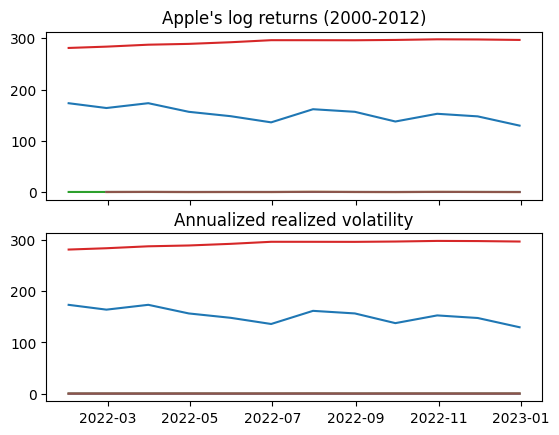

In [8]:
# Plotting data

import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[0].set_title("Apple's log returns (2000-2012)")
ax[1].plot(df_rv)
ax[1].set_title("Annualized realized volatility")
plt.show()
